# Data Science Salary Comparision in Two Different Regions

STAT 201 - Final Project \
Group 20 （Yulu Duan, Leo Lin, Chenyue Qian, Violet Yang)

## 1. Introduction

**1.1 Background Information**

Data science is undoubtedly one of the most lucrative career options. However, it's crucial to recognize that salary can vary significantly based on factors like location and company (Situ et al., 2017). Therefore, it's essential to weigh all aspects when choosing job offers (Robinson et al., 2020). Hence, analyzing the difference in salary between different regions could provide employees insights to choose a place to start their journey in data science. Data science salary rankings have reported that North America typically offers higher salaries for data science jobs compared to those in Europe (Ganguli, 2021). So in this case, we would like to investigate this statement through the data we have. We choose American, Mexico and Canada in Norther America and several representative countries in Europe.

**1.2 Research Question**

* Is there evidence to support the claim that data science jobs in North America offer higher salaries than those in Europe?

More specifically, we focus on the disparity in data science job salaries between two regions, Europe and North America. Our response variable is the salary, and we will use **difference in mean** salary and **standard deviation** of salary to evaluate this question. 

Meanwhile, we choose the difference in mean salary to be Mean North America data science job salaries minus Mean Europe data science job salaries. Hence, the parameter we are interested in is $\mu_{na} - \mu_{eur}$ and our test statistic is $\bar{x}_{na} - \bar{x}_{eur}$, where $\mu_i$ is the population mean salary in region i, $\bar{x}_{i}$ is the sample mean salary in region i; $na$ and $eur$ indicates North America and Europe, respectively.

**1.3 The Dataset**

Our dataset is a sample with information regarding the data science jobs’ salaries in different locations during the 2020-2022 (Bhatia, 2022). 

Below are variables related to our study:

1. `company_location` - Country where employer work.
2. `location` - Regions where employees work (created by us, either Europa or North America)
3. `salary_in_usd` - Salary in USD


## 2. Methods and Results

**2.1 Data Cleaning**

In [16]:
install.packages("infer")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [17]:
# load necessary packages
library(infer)
library(tidyverse)
library(cowplot)
library(broom)

In [18]:
# load raw data
raw_salary <- read.csv("https://raw.githubusercontent.com/YuluDuan/Hypothesis-Testing-Data-Science-salary-comparison-in-different-location/main/ds_salaries.csv")

head(raw_salary)

,X,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
2,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
3,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
4,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
5,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
6,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L


We first clean the data and create the final dataset.

In [19]:
# by checking all the countries appears in the sample data, first find out the countries that belongs to Europe and North America.

na <- c("US", "MX","CA")
eur <- c("DE", "GB", "HU", "FR", "GR", "NL", "AT", "ES", "PT", "DK", "IT", "HR", "LU"
         ,"PL", "RO", "BE", "UA", "RU", "MT", "MD", "SI", "CH", "CZ", "EE", "IE")

In [20]:
# fliter out all rows belong to Europe and North America, save them to a new column called "location"

ds_salary <- raw_salary %>%
    filter(company_location %in% append(na, eur)) %>%
    mutate(location = "North America")

ds_salary$location[ds_salary$company_location %in% eur] <- "Europe"

ds_salary$location <- as.factor(ds_salary$location)

In [21]:
# create the final data set for this project by selecting columns that we would be useful.
ds_final <- ds_salary %>%
    select(salary_in_usd, location)
head(ds_final) # overview of the data

,salary_in_usd,location
,<int>,<fct>
1,79833,Europe
2,109024,Europe
3,150000,North America
4,72000,North America
5,190000,North America
6,35735,Europe


**2.2 Data Summary and Visualization**

In [22]:
# create the summary of the data by setting a table with information about salary
ds_eur <- ds_final %>%
    filter(location == "Europe")
ds_na <- ds_final %>%
    filter(location == "North America") # create two datasets, one for each region

summary_eur <- summary(ds_eur$salary_in_usd)
summary_na <- summary(ds_na$salary_in_usd)

location <- c("Europe", "North America")
mini <- c(summary_eur[1], summary_na[1])
quan_1 <- c(summary_eur[2], summary_na[2])
median <- c(summary_eur[3], summary_na[3])
mean <- c(summary_eur[4], summary_na[4])
quan_3 <- c(summary_eur[5], summary_na[5])
max <- c(summary_eur[6], summary_na[6])
sample_size <- summary(ds_final$location)
sd <- c(sd(ds_eur$salary_in_usd), sd(ds_na$salary_in_usd)) #calculate different kinds of sample summary
table1 <- data.frame(minimum_wage = mini, first_quantile = quan_1, 
                     median_wage = median, mean_wage = mean, third_quantile = quan_3, 
                     maximum_wage = max, standard_deviation = sd,sample_size)
table1

,minimum_wage,first_quantile,median_wage,mean_wage,third_quantile,maximum_wage,standard_deviation,sample_size
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Europe,5882,46597.0,63831,69358.37,87932,230000,35261.06,157
North America,2859,99037.5,130400,139769.85,170000,600000,69754.52,388


<font color='grey'>Table 1. Summary of the Wages in Two Different Locations</font> 

For Europe, the sample mean salary ($\bar{x}_{eur}$) is 69358.37; while for North America, the sample mean salary ($\bar{x}_{na}$) is 139769.85. \
Our **test statistic**, i.e. difference in sample mean ($\bar{x}_{na} - \bar{x}_{eur}$), is 70411.48.

Warning message:
“Ignoring unknown parameters: linewidth”
Warning message:
“Ignoring unknown parameters: linewidth”


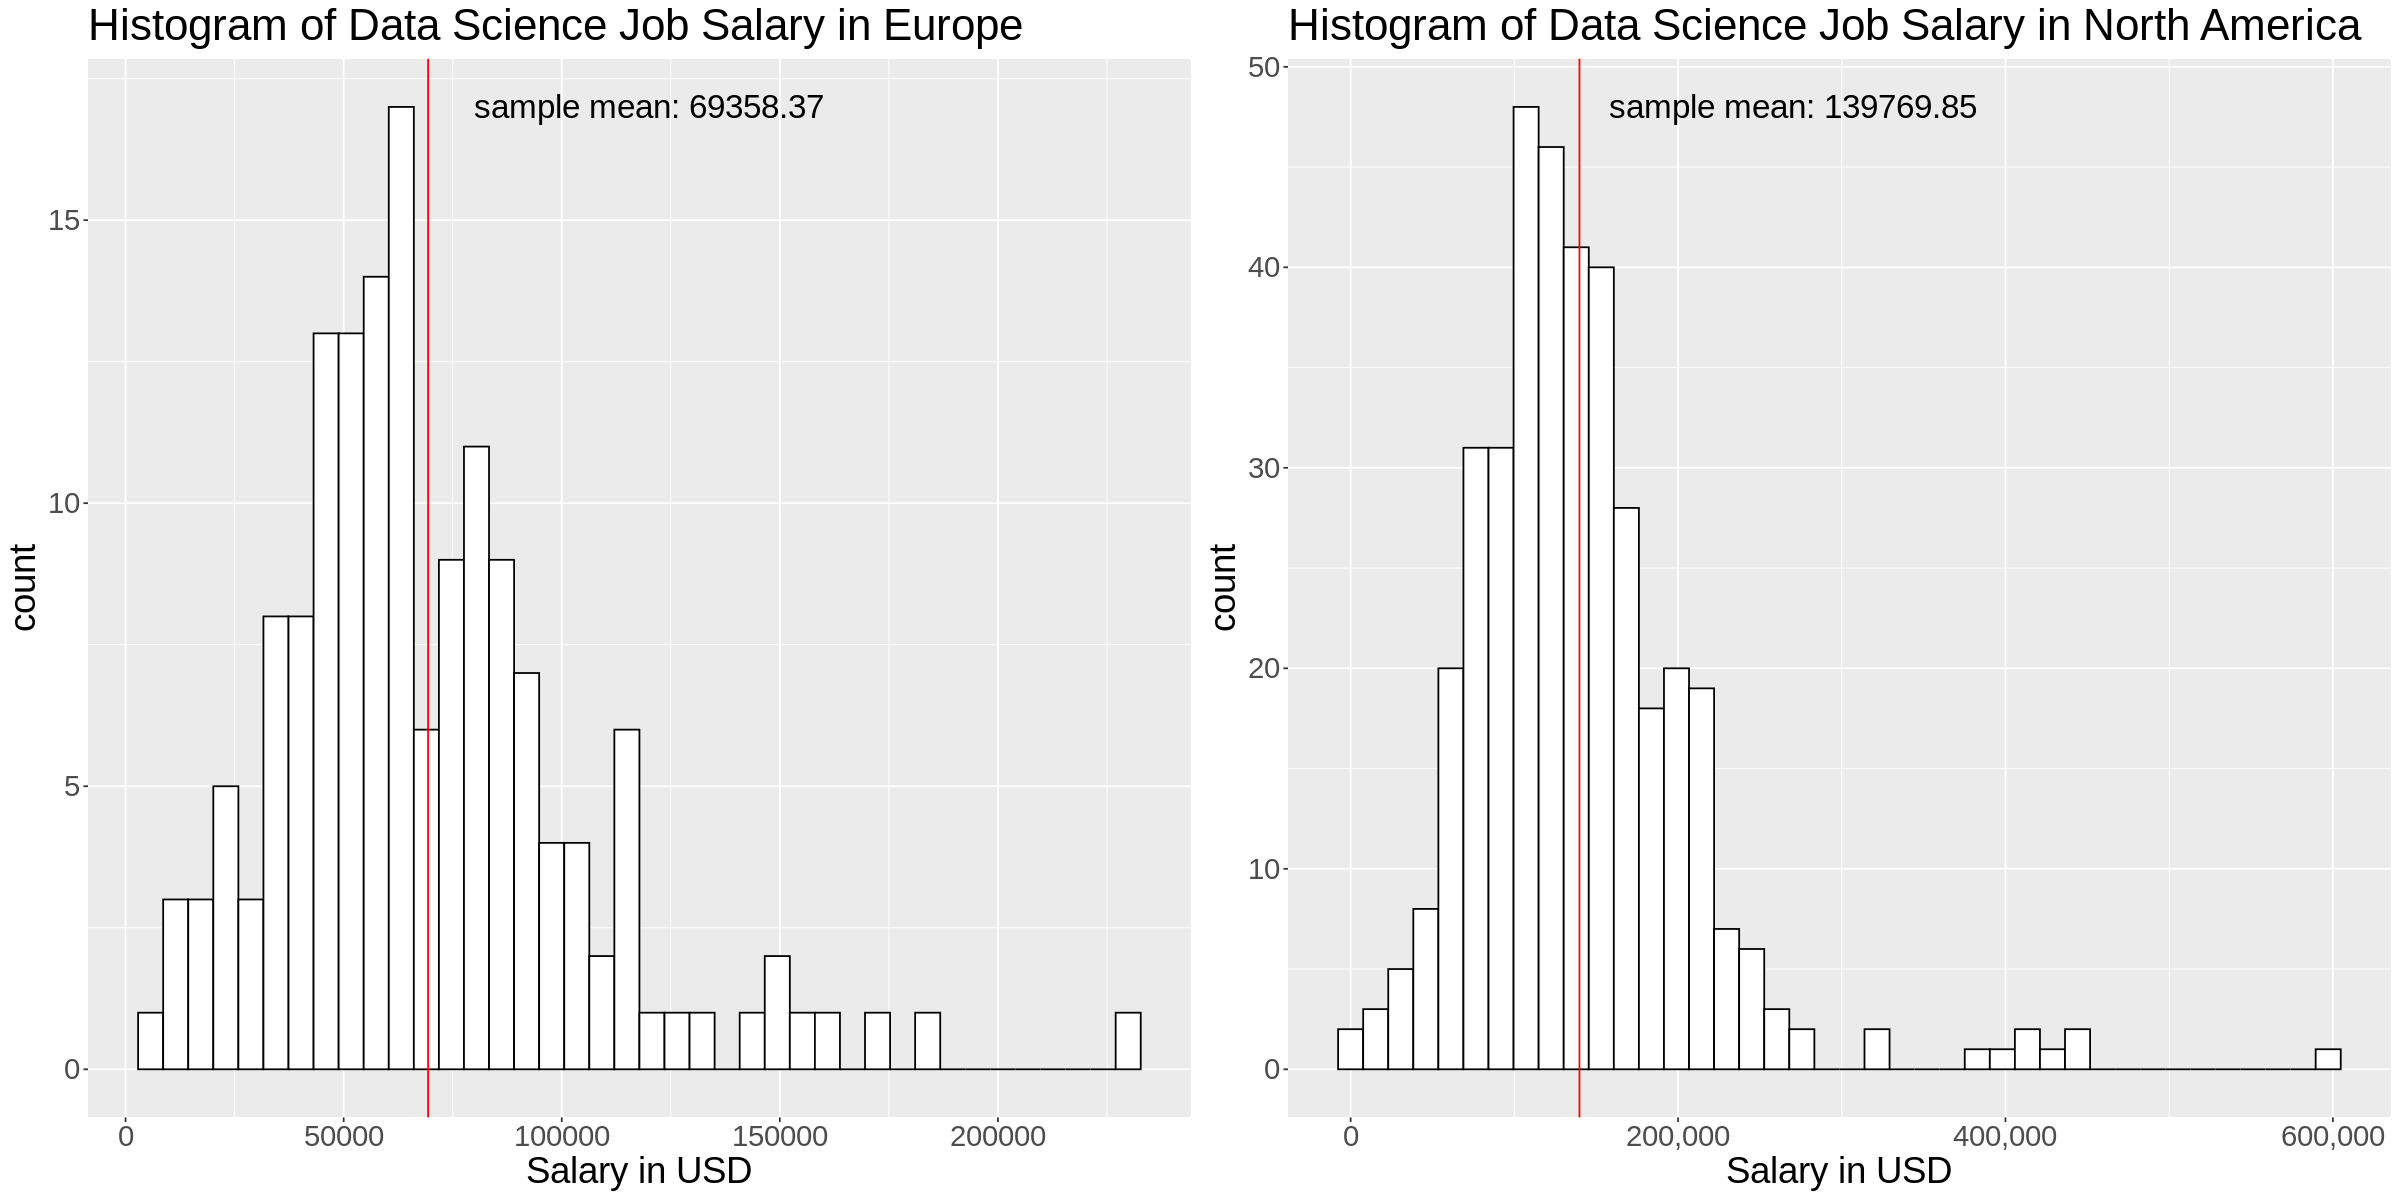

In [23]:
## create the two distributions

options(repr.plot.width= 20, repr.plot.height=10) #control the graph size
histogram_europe <- ds_final %>% 
    filter(location == "Europe") %>%
    ggplot(aes(x = salary_in_usd)) +
    geom_histogram(color="black", fill="white", bins = 40) +
    theme(text = element_text(size = 22)) +
    xlab("Salary in USD") + 
    ylab("count")+
    ggtitle("Histogram of Data Science Job Salary in Europe") + 
    geom_vline(xintercept = table1$mean_wage[1], color = "red", linewidth = 2) + #add the line of sample mean
    annotate("text", x = 120000, y = 17, label = "sample mean: 69358.37", size = 7) 

histogram_na <- ds_final %>%
    filter(location == "North America") %>%
    ggplot(aes(x = salary_in_usd),color = 'white') +
    geom_histogram(color="black", fill="white",bins = 40) +
    theme(text = element_text(size = 22)) + 
    xlab("Salary in USD") + 
    ylab("count") +
    ggtitle("Histogram of Data Science Job Salary in North America") +
    geom_vline(xintercept = table1$mean_wage[2], color = "red", linewidth = 2) + #add the line of sample mean
    annotate("text", x = 270000, y = 48, label = "sample mean: 139769.85", size = 7) +
    scale_x_continuous(labels = scales::comma)

plot_grid(histogram_europe, histogram_na, labels = c('', ''))

<font color='grey'> Figure 1. Histograms of Salary in Europe and North America <font>

Now, we provide side-by-side boxplot to look at the spread of salaries for each region.

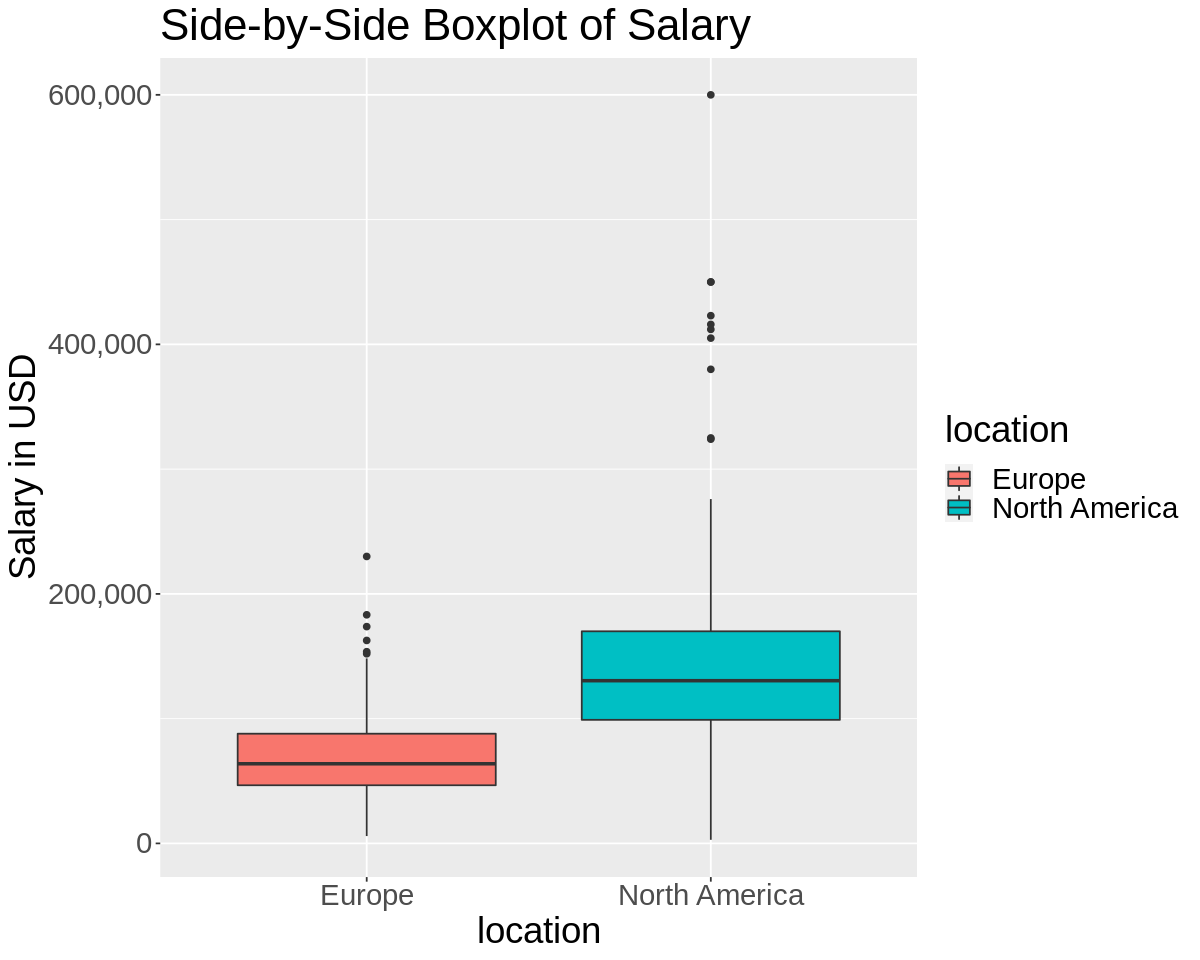

In [24]:
options(repr.plot.width=10, repr.plot.height=8)
boxplot_ds <- ggplot(ds_final, aes(x = location, y = salary_in_usd, fill = location)) +
    geom_boxplot() +
    theme(text = element_text(size = 22)) +
    ylab("Salary in USD") +
    ggtitle("Side-by-Side Boxplot of Salary") + 
    scale_y_continuous(labels = scales::comma)
    
boxplot_ds

<font color='grey'> Figure 2: Boxplot of Salaries in Two Different Regions <font>

In [ ]:
limitation discussion outliers exclude

**2.3 Data Analysis**

In this section, we would conduct analysis to help answer our research question. Based on the sample, we believe that our data come from two independent populations; hence, we would implement techniques and formulas for two independent samples to find confidence interval and do hypothesis testing via both bootstrap and asympototic methods.

**2.3.1 Standard Deviation**

Before we conduct the analysis on difference in means, we would like to first investigate the standard deviation for salaries. This would not only provide some insights towards the true standard deviation for the two populations, but also help us to decide whether to choose **equal variance** when finding the standard error formula for asymptotic method.

Hence, we would perform the 95% confidence intervals for two population standard deviations of data science job salary via bootstrap method here since it is harder to use the asymptotic method for standard deviation. In the following code, we first set the seed to ensure reproducibility and we get the bootstrap distributions for salary in Europe and North America seperately. Then, we visualize the two bootstrap distributions and the two confidence intervals based on the standard deviation of bootstrap resamples. 

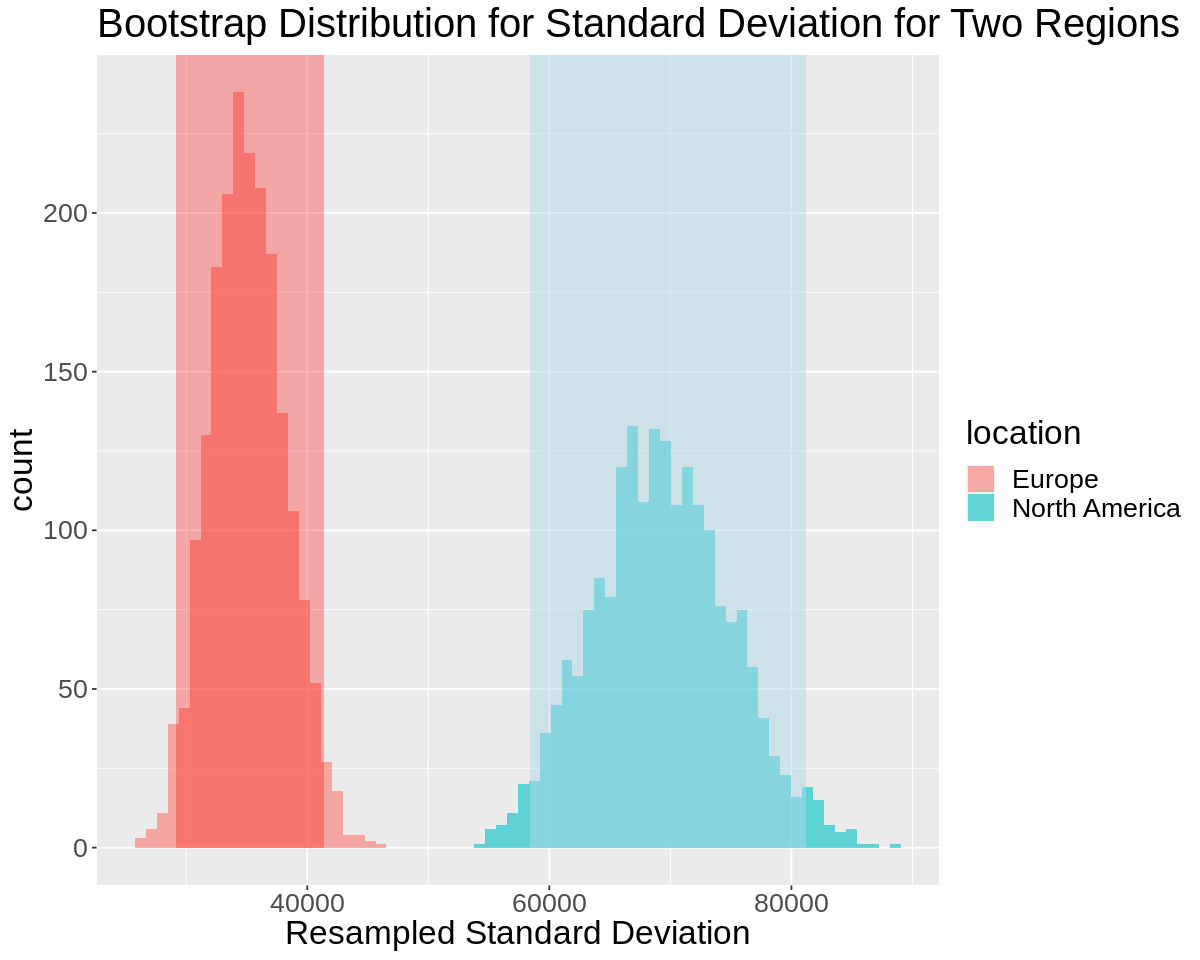

In [25]:
# set seed to ensure reproducibility
set.seed(201)

# bootstrap distribution for sd in eur
boot_sd_eur <- ds_eur %>% 
    specify(response = salary_in_usd) %>% 
    generate(reps = 2000, type = "bootstrap") %>%
    calculate(stat = "sd")

# bootstrap distribution for sd in na
boot_sd_na <- ds_na %>% 
    specify(response = salary_in_usd) %>% 
    generate(reps = 2000, type = "bootstrap") %>%
    calculate(stat = "sd")

# combine the two bootstrap distribution together
boot_sd_eur$location <- "Europe"
boot_sd_na$location <- "North America"

boot_new <- rbind(boot_sd_eur, boot_sd_na)
boot_new <- boot_new[, -1]

# get two confidence intervals
ci_eur <- tibble(lower_ci = quantile(boot_sd_eur$stat, 0.025),
                 upper_ci = quantile(boot_sd_eur$stat, 0.975))
ci_na <- tibble(lower_ci = quantile(boot_sd_na$stat, 0.025),
                 upper_ci = quantile(boot_sd_na$stat, 0.975))

# draw the histogram of two bootstrap distribution in a same plot
plot_sigma <- ggplot(boot_new, aes(x = stat, fill = location)) +   # Draw overlaying histogram
    geom_histogram(position = "identity", alpha = 0.6, bins = 70) +
    xlab("Resampled Standard Deviation") +
    ggtitle("Bootstrap Distribution for Standard Deviation for Two Regions") +
    theme(text=element_text(size= 20)) +
    annotate("rect", xmin = ci_eur$lower_ci, xmax = ci_eur$upper_ci, ymin = 0, ymax = Inf,
             fill = "red",
             alpha = 0.3) + 
    annotate("rect", xmin = ci_na$lower_ci, xmax = ci_na$upper_ci, ymin = 0, ymax = Inf,
             fill = "lightblue",
             alpha = 0.5)# Set label size
plot_sigma

<font color='grey'> Figure 3. Histograms of Bootstrap Distribution of Standard Deviation for Salary in North America and Europe <font>

In the above plot, we have shaded the two 95% confidence intervals for standard deviations of salary use rectangles. We can see that the variation for bootstrap distribution of standard deviations for North America is larger compared with the one for Europe. Also, it is clear that there is no intersection between the two confidence intervals, which is a strong indication that the true standard deviations of salary in North America and Europa are different. This discovery hints that we should assume unequal variance when calculating the Standard Error for difference in mean salary for asympototic method.

**2.3.2 Confidence Interval**

Now, we would perform 95% confidence interval for true mean salary difference $\mu_{na} - \mu_{eur}$ to quantify the errors of our estimate.

**Confidence Interval by Bootstrap**

To start with, we would use bootstrap method, and we generate the bootstrap distribution with repetition of 2000. Then, we calculate the lower tail and upper tail of the confidence interval and plot it on the bootstrap distribution.

Warning message:
“Ignoring unknown parameters: linewidth”
Warning message:
“Ignoring unknown parameters: linewidth”


lower_ci,upper_ci
<dbl>,<dbl>
61517.07,78922.47


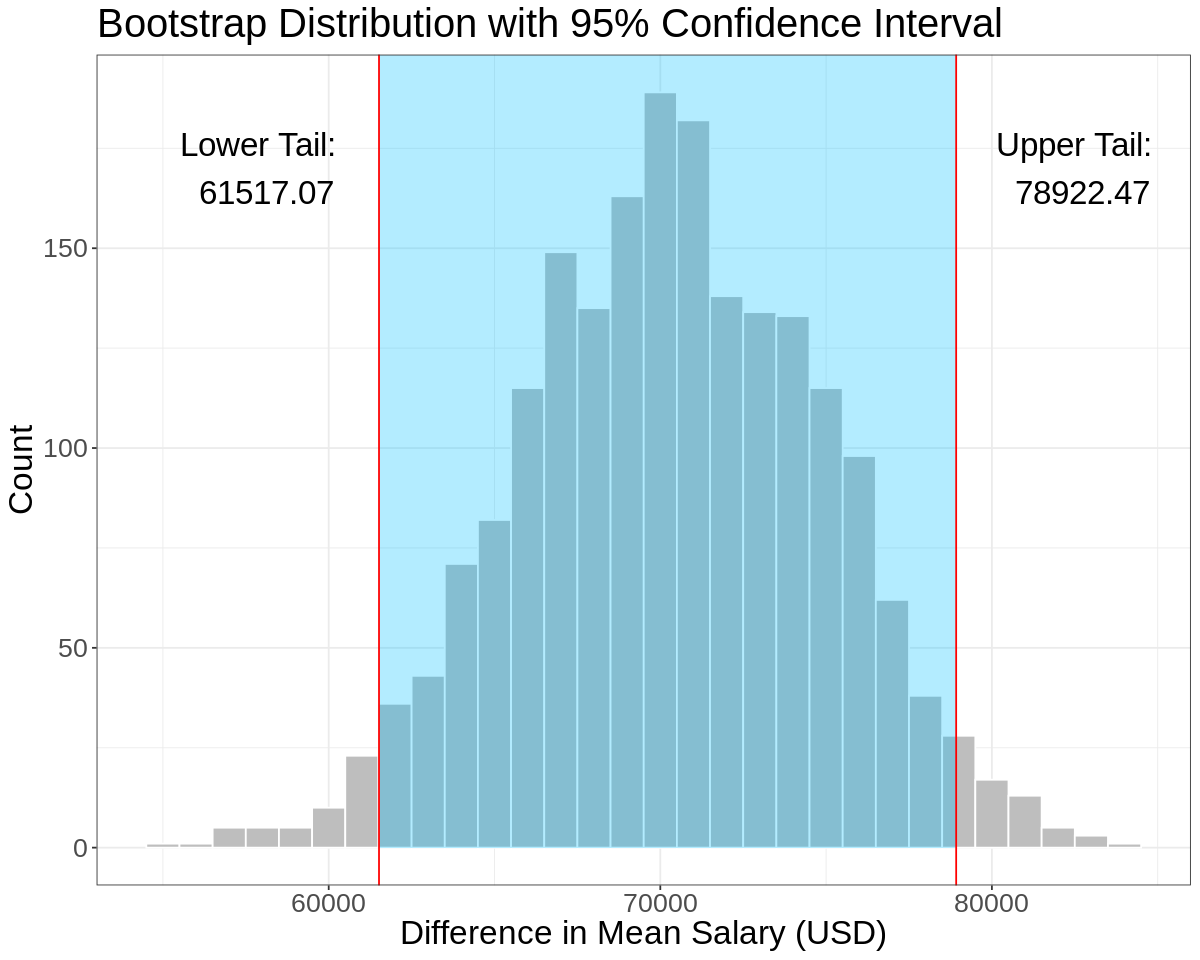

In [26]:
# set seed to ensure reproducibility
set.seed(201)

# first, we get the bootstrap distribution
boot_sample <- ds_final %>% 
   specify(formula = salary_in_usd ~ location) %>% 
   generate(reps = 2000, type = "bootstrap")

# calculate the diff in means from bootstrap resamples
boot_model <- boot_sample %>%
   calculate(stat="diff in means", order = c("North America", "Europe"))
# get the 95% confidence interval 
ci_boot <- tibble(lower_ci = quantile(boot_model$stat, 0.025),
                  upper_ci = quantile(boot_model$stat, 0.975))
# get histogram
boot_his <- ggplot(boot_model, aes(x = stat)) + 
    geom_histogram(binwidth = 1000, colour = "white",fill = "grey") +
    annotate("rect", xmin = ci_boot$lower_ci, xmax = ci_boot$upper_ci, ymin = 0, ymax = Inf,
             fill = "deepskyblue",
             alpha = 0.3) +
    labs(title = "Bootstrap Distribution with 95% Confidence Interval", # label
         x = "Difference in Mean Salary (USD)",
        y = "Count") +
    geom_vline(xintercept = ci_boot$lower_ci, color = "red", linewidth = 2) + #add the line of lower tail
    annotate("text", x = 58000, y = 170, label = "Lower Tail: \n 61517.07", size = 7) + #add annotation
    geom_vline(xintercept = ci_boot$upper_ci, color = "red", linewidth = 2) + #add the line of upper tail
    annotate("text", x = 82600, y = 170, label = "Upper Tail: \n 78922.47", size = 7) + #add annotation
    theme_bw() +
    theme(text=element_text(size= 20))
boot_his
ci_boot

<font color='grey'> Figure 4. Histogram of Bootstrap Distribution of Difference in Mean Salary <font>

We are 95% confident that true difference in mean salary between North America and Europe is [61517.07, 78922.47] based on the bootstrap simulation.
+ explanation

Based on the bootstrap simulation,  We have 95% confidence that the difference in the true mean salary between North America and Europe is between 61517.07 and 78922.47 USD.


**Confidence Interval by Asympototic Method**

In this part, we would find the 95% confidence interval via asympototic Method. Since we did not know whether the population for salary in North America and Europa follow Normal, it is important to first check the assumptions before we implement the Central Limit Theorem (CLT):

1. Independent: Our sample consist of 158 and 388 data from Europe and North America, respectively. By logical thinking, the total number of data science job in Europe and North America should be greater than 1580 and 3880, respectively. Hence, since our two samples are both smaller than 10% of the population, it would be safe to assume independent here.
2. Parameter Type: Here as we are dealing with a parameter that is difference in means, which is construct via linear combination of random variables. Hence, we meet the assumption of sum of random variables.
3. Sample Size: To use CLT, we need sample size to be large. A common rule of thumb is that the sample size should be larger than 30. Here, our two sample sizes are 158 and 388, which is fairly large to use CLT.

Hence, as all the assumptions for CLT are met, it would be safe to use asympototic method now. In the following code, we use build-in R function `t.test` with unequal variance as examined above to calculate the confidence interval.

In [27]:
# calculate the confidence interval through t.test
t_test <- t.test(x = ds_na$salary_in_usd, y = ds_eur$salary_in_usd, var.equal = FALSE)
output <- tidy(t_test)

# select confidence interval
output[c(7,8)]

conf.low,conf.high
<dbl>,<dbl>
61525.29,79297.66


+ interpretation

Based on the asymptotic method,  We have 95% confidence that the difference in the true mean salary between North America and Europe is between 61525.29 and 79297.66 USD.

**2.3.3 Hypothesis Testing**

Here, we would conduct the hypothesis testing with significance level of 5% to see whether there is strong evidence that data science job offer a higher salary in North America than in Europe. 


**Null Hypothesis (H0)**: there is no difference in the true mean salary between data science jobs in North American and Europe. ($\mu_{na} = \mu_{eur}$)\
**Alternative Hypothesis (Ha)**: the true mean salary in North American is higher than the true mean salary in Europe. ($\mu_{na} > \mu_{eur}$)


**Hypothesis Testing by Simulation**

Similar to confidence interval, we would use infer package to conduct the hypothesis testing using permutation with 2000 replicates. Then, we would provide the histogram of our null model.

In [28]:
# set seed to ensure reproducibility
set.seed(201)

# test statistic
t <- (table1$mean_wage[2] - table1$mean_wage[1])
# we get the null model
null_model <- ds_final %>% 
    specify(formula = salary_in_usd ~ location) %>% 
    hypothesize(null = "independence") %>%
    generate(reps = 2000, type = "permute") %>%
    calculate(stat = "diff in means", order = c("North America", "Europe"))

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


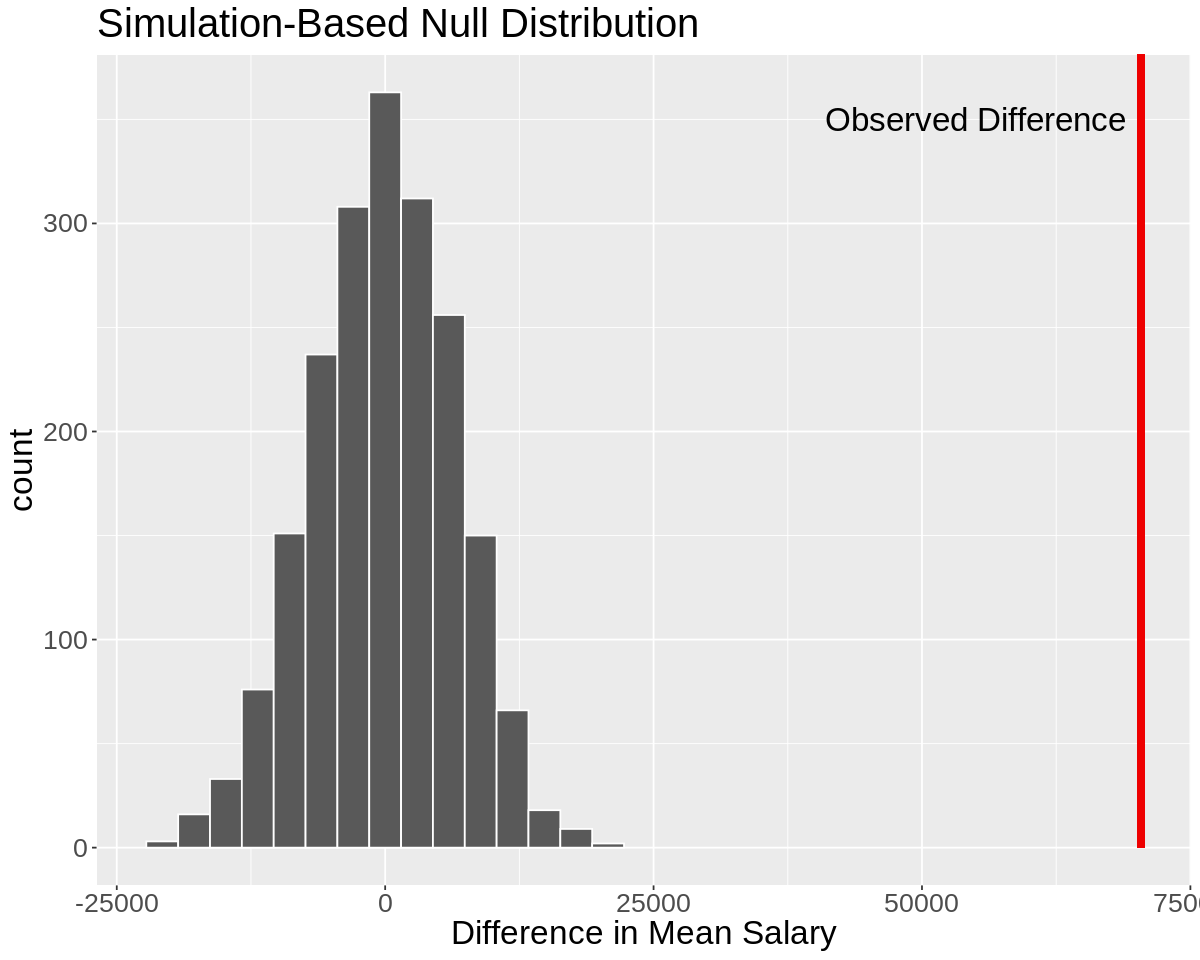

In [29]:
# visualize the null model 
null_histogram <- null_model %>% 
    visualize() +
    shade_p_value(obs_stat = t, direction = "right") + 
    theme(text=element_text(size= 20)) +
    xlab("Difference in Mean Salary") + 
    annotate("text", x = 55000, y = 350, label = "Observed Difference", size = 7)

# get the p-value                
p_value <- null_model %>%
    get_p_value(obs_stat = t, direction = "right")

null_histogram               

<font color='grey'> Figure 5. Histogram of Null Distribution of Difference in Mean Salary Based on Simulation<font>

From the graph above, we can see that the simulation result provides a p-value of 0. But it would be very danger to report this since we only did repetition of 2000. Hence, we would conclude is that we reach a p-value smaller than $ \frac{1}{2000 } (0.0005)$ from simulation based hypothesis testing. This provides strong evidence that we should reject our null hypothesis in favor that the true mean salary in North American is higher than the true mean salary in Europe.  

**Hypothesis Testing by Asympototic Method**

We would now use hypothesis testing based on asypototic method. Again, we would need to rely on CLT. Since we have already check the assumptions above, we can directly use `t.test` in R to perform the two sample t-test, and we would provide null model and visualize the p-value.

Warning message:
“Ignoring unknown parameters: linewidth”


p.value
<dbl>
4.23948e-45


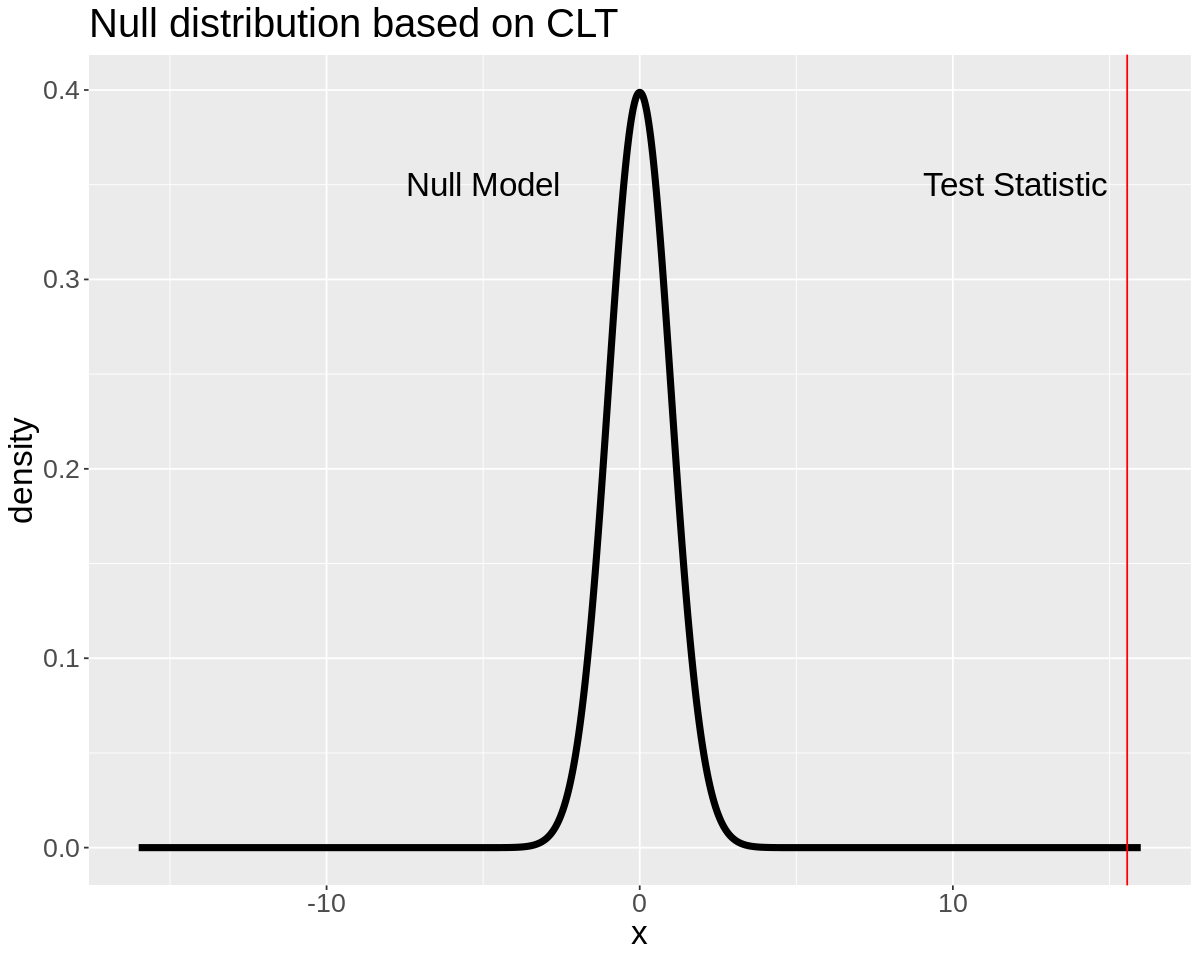

In [30]:
# NOTE: we directly take output from t-test for Confidence interval as they are the same
p_value <- output[,5]

# Create the null model 
t_null_model <-   
    ggplot() +
    geom_line(data = tibble(x = seq(-16, 16, 0.01), # generate the t-distribution line
                            density = dt(x, 517.82)), 
              aes(x = x, y = density), color = "black", lwd = 2) +
    ggtitle("Null distribution based on CLT") +
    theme(text = element_text(size = 20)) +
    geom_vline(xintercept = t/t_test$stderr, color = "red", linewidth = 2) + 
    annotate("text", x = 12, y = 0.35, label = "Test Statistic", size = 7) +
    annotate("text", x = -5, y = 0.35, label = "Null Model", size = 7)

p_value
t_null_model

<font color='grey'> Figure 6. Histogram of Null Distribution of Difference in Mean Salary Based on T-Distribution<font>

Similarly, the p-value we get from asympototic method is very small, meaning that we would again reject the null hypothesis as in simulation-based hypothesis testing. 

**2.3.4 Comparision and Results**

For confidence interval, we can see that the results provided by bootstrap and asympototic methods are similar, with the one from asympototic being a bit wider. For hypothesis testing, both methods provides very small p-value that would lead to rejection of null hypothesis at any reasonable significance level.
We do expect both results to be similar and trustworthy since two methods should would work well with following reasons:
    1. Our sample sizes are fairly large, indicating that the sample could be potentially representative.
    2. the assumptions for CLT are met, meaning that the asympototic method is appropriate here.
    
To make conclusion, we decide to report results from asypototic method since it provide a exact value for the p-value while the bootstrap method can only provide a possible range for p-value.

Hence, we concluded that the difference in the true mean salary between North America and Europe is between 61525.29 and 79297.66 USD with 95% of confidence; besides, a p-value of $4.24 \times 10^{-45}$ provides strong evidence that the true mean salary in North American is higher than the true mean salary in Europe.
    

## 3. Discussion

For our research question, we have strong evidence to support the claim that data science jobs in North America offer higher salaries than those in Europe based on the above analysis. Hence, the result we get matches the statement made in Data science salary rankings. Also, this result might attract new graduates in data science to go to North America to start their first job. 

Although this result matches our expectations, we think there could be other factors like job type(Data Scientists, Data Engineer), and company sizes that have interaction with the location. For example, it might be the case that more large companies are located in North America and they tend to provide a higher salary. In that sense, company size becomes more important compared with location. Hence, future studies could explore factors that impact salaries in data science jointly through methods such as building linear models. There are several limitations in this study, obviously, in the Figure (Side-by-Side Boxplot of Salary), we ignore the existence of outliers which causes the limitation of the sample mean of two regions. Furthermore, even though our study covered several European countries, due to other missing countries, the missing data will affect the reality of the final result. A larger accurate data will improve our results assurance in the future study.


## 4. References

Bhatia, R. (2022). Data Science Job Salaries. Kaggle. https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

Ganguli, D. (2021, May 28). Top 10 countries with the highest salaries for data scientists. Analytics Insight. Retrieved April 3, 2023, from https://www.analyticsinsight.net/top-10-countries-with-the-highest-salaries-for-data-scientists/

Robinson, E., Nolis, J., & O'Reilly for Higher Education. (2020). Build a career in data science. Manning Publications Co.

Situ, W., Zheng, L., Yu, X., & Daneshmand, M. (2017). Predicting the probability and salary to get data science job in top companies. IIE Annual Conference. Proceedings, 933-939.